In [6]:
# Initial imports
import os
import csv
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings
from pathlib import Path
import datetime as dt

#Subsequent imports
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import hvplot.pandas

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
%matplotlib inline

In [7]:
# List the ticker symbols for the stocks of interest
lst=['BNS.TO', 'BMO.TO', 'CM.TO', 'NA.TO','RY.TO', 'TD.TO', 'ZEB.TO','ZWB.TO', 'XGB.TO', 'CL' ]

# Determine the start and end dates
start_date = '2014-08-01'
end_date = '2018-07-31'

# Create empty dataframe to hold stock data
all_stocks_df=pd.DataFrame()

# Gathers stock data from listed tickers and combines them into a dataframe
for ticker in lst:
    # Create data frame from API in loop 
    df= yf.download(ticker, start= start_date, end= end_date)
    # Remove to '.TO' suffix from Canadian stocks
    tic= ticker.replace('.TO','')
    df['Ticker']=tic
    # Drop unwanted coloumns - Keep Adjusted Close
    df.drop(columns= ["Open", "High", "Low", "Volume", "Close", "Ticker"], inplace= True)
    # Combine individual stocks into a single data frame
    all_stocks_df=pd.concat([all_stocks_df, df], axis= 1)

# Rename the coloumns to the ticker symbols in the list
all_stocks_df.columns = lst
all_stocks_df.index.name = 'Date'

# Drop the N/As
all_stocks_df = all_stocks_df.dropna()

# Drop the time component of the date
all_stocks_df.index = all_stocks_df.index.date

# Display the data
display(all_stocks_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BNS.TO,BMO.TO,CM.TO,NA.TO,RY.TO,TD.TO,ZEB.TO,ZWB.TO,XGB.TO,CL
2014-08-01,49.829815,57.142662,33.561260,34.731907,57.419659,41.017838,17.509151,10.899135,17.621975,52.814495
2014-08-05,49.721306,57.242641,33.437351,34.624058,57.564346,40.814632,17.494394,10.892867,17.605623,52.665840
2014-08-06,49.443272,57.256939,33.554558,34.782227,57.680103,40.945255,17.516533,10.899135,17.621975,53.516506
2014-08-07,48.955009,56.756931,33.504333,34.674385,57.434143,40.596912,17.427992,10.861528,17.638334,53.227436
2014-08-08,48.520988,56.614086,33.269920,34.660011,57.123039,40.342911,17.346821,10.811391,17.654709,53.830334
...,...,...,...,...,...,...,...,...,...,...
2018-07-24,61.322594,86.081711,46.920662,54.206623,85.429741,63.913288,25.041731,14.950849,19.210960,58.957569
2018-07-25,61.451012,86.040291,47.145695,54.317669,85.252258,64.542931,25.100977,15.004933,19.141333,59.571793
2018-07-26,61.330643,86.073448,47.358677,54.206623,85.421288,64.282715,25.100977,14.989473,19.105167,60.466061
2018-07-27,61.451012,86.181137,47.475216,54.411636,85.429733,64.433800,25.143410,15.011205,19.114214,60.213139


c:\Users\gbras\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\gbras\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\gbras\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
c:\Users\gbras\anaconda3\envs\dev\envs\dev\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index c

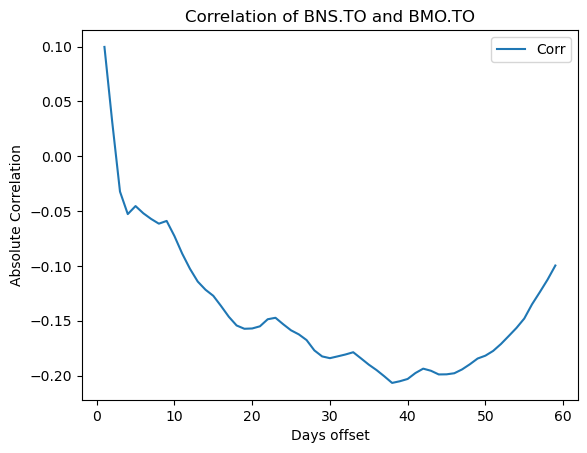

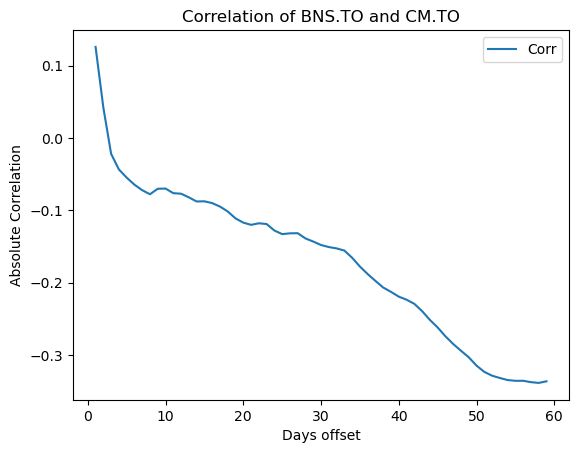

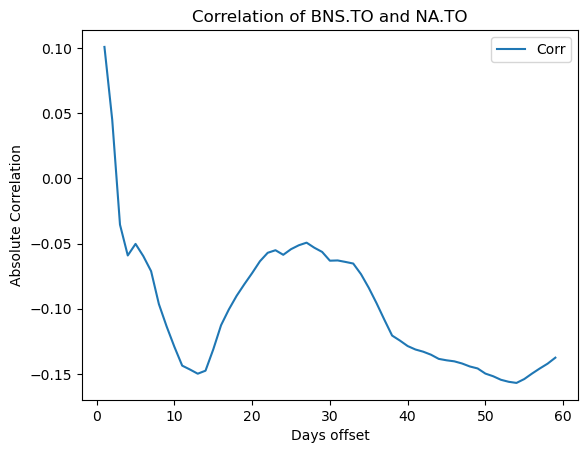

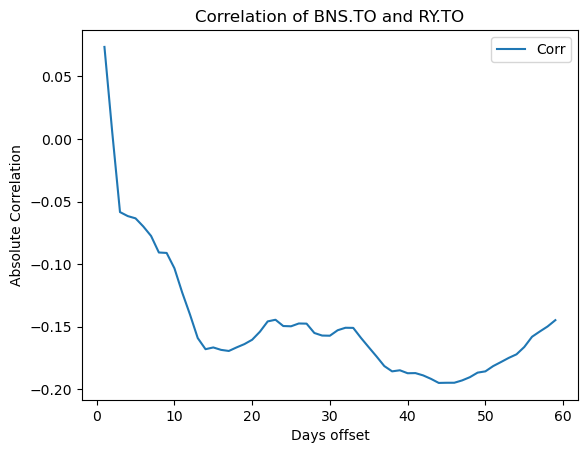

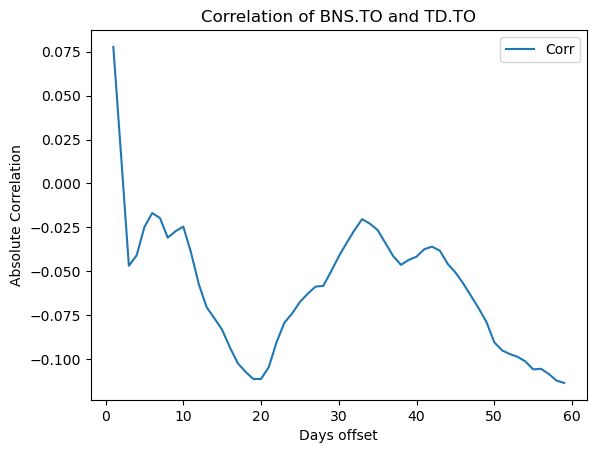

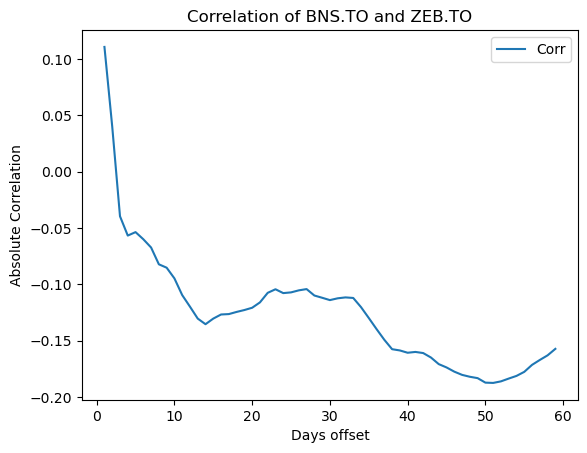

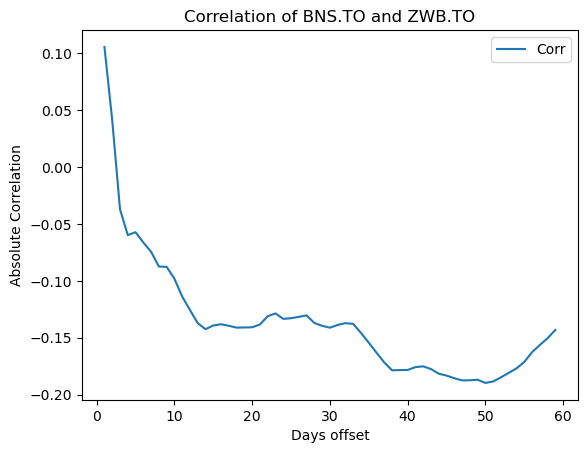

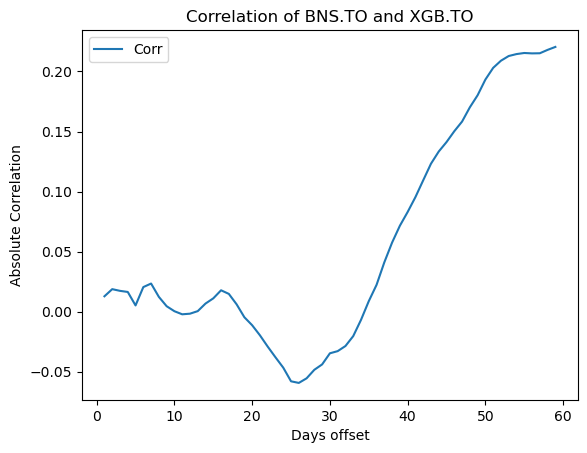

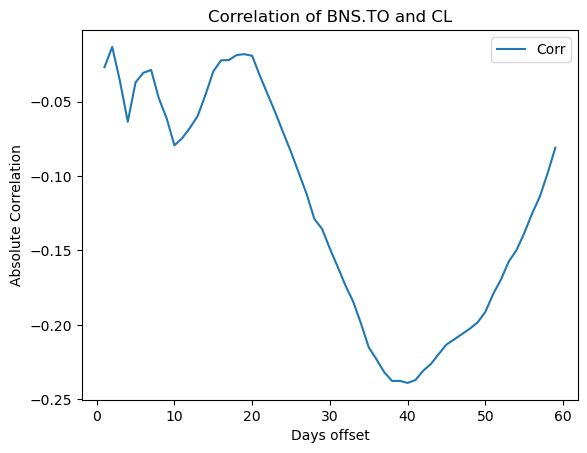

In [8]:
# Loop through all securities as a leading indicator:
index_count = 0
max_range = 60
df_correlation = pd.DataFrame(columns = ['p', 'Leader', 'Target', 'Corr', 'AbsCorr'] )
lst = all_stocks_df.columns.to_list()
lst.remove('BNS.TO')
target = ['BNS.TO']

# Compare each stock to BNS and determine the correlation over time
for leader in lst:
    # Create and empty DataFrame for closing prices
    df_closing_prices = pd.DataFrame()
        
    # Fetch the closing prices of Stock being lead
    df_closing_prices[leader] = all_stocks_df[leader]
    df_closing_prices[target] = all_stocks_df[target]
        
    # Drop columns not required
    df_closing_prices=df_closing_prices.dropna()

    # Loop through various Leading Indicator Scenarios:
    for p in range(1, max_range):
        dfopt=df_closing_prices
        dfopt['Target_Change']=dfopt[target].pct_change(p).shift(-p)
        dfopt['Leader_Change']=dfopt[leader].pct_change(p)
        dfopt=dfopt[['Target_Change','Leader_Change']]
        dfcorr = dfopt.corr() 
        dfopt=dfopt.dropna()
        dfopt['RtnQuantile']=pd.qcut(dfopt['Target_Change'], 5, labels = False)
        dfPlot=dfopt.groupby('RtnQuantile')[['Leader_Change']].mean()
        
        # Put correlation into a dataframe            
        df_temp = pd.DataFrame({"p":p, "Leader":leader, "Target":target, "Corr":dfcorr.iloc[0][1], "AbsCorr": abs(dfcorr.iloc[0][1])}, index = [index_count])
        df_correlation = pd.concat([df_correlation, df_temp], axis = "rows")
        index_count += 1
        
    # Plot the correlation between BNS and the leader as a function of the number of days offset
    df_leader = df_correlation.loc[df_correlation['Leader'] == leader]

    df_leader.plot(x = 'p', y = 'Corr', title= f'Correlation of BNS.TO and {leader}', xlabel= 'Days offset', ylabel='Absolute Correlation')
    
    #display(dfPlot.hvplot.bar())
    #display(dfopt.hvplot.scatter(y='Target_Change',x='Leader_Change'))
            
    del(dfopt)
    del(dfPlot)

In [9]:
df_correlation.drop(df_correlation[(df_correlation['Leader'] == 'BNS.TO')].index, inplace=True)
display(df_correlation)

,p,Leader,Target,Corr,AbsCorr
0,1,BMO.TO,BNS.TO,0.099676,0.099676
1,2,BMO.TO,BNS.TO,0.031242,0.031242
2,3,BMO.TO,BNS.TO,-0.032270,0.032270
3,4,BMO.TO,BNS.TO,-0.052779,0.052779
4,5,BMO.TO,BNS.TO,-0.045454,0.045454
...,...,...,...,...,...
526,55,CL,BNS.TO,-0.138385,0.138385
527,56,CL,BNS.TO,-0.125356,0.125356
528,57,CL,BNS.TO,-0.113885,0.113885
529,58,CL,BNS.TO,-0.098252,0.098252
